In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix


In [6]:
data = pd.read_csv('Largest-Companies.csv', encoding='latin-1')

In [7]:
# Display basic information
print("Basic Information:\n")
print(data.info())


Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2001 non-null   int64  
 1   Name          2001 non-null   object 
 2   Sales         2001 non-null   float64
 3   Profit        2001 non-null   float64
 4   Assets        2001 non-null   float64
 5   Market Value  2001 non-null   float64
 6   Industry      1999 non-null   object 
 7   Founded       1999 non-null   float64
 8   Headquarters  1991 non-null   object 
 9   Country       2001 non-null   object 
 10  CEO           1970 non-null   object 
 11  Employees     1943 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 187.7+ KB
None


In [8]:
# Display the first few rows
print("\nFirst 5 Rows:\n")
print(data.head())


First 5 Rows:

   Rank                                      Name  Sales  Profit  Assets  \
0     1                            JPMorgan Chase  252.9    50.0  4090.7   
1     2                        Berkshire Hathaway  369.0    73.4  1070.0   
2     3  Saudi Arabian Oil Company (Saudi Aramco)  489.1   116.9   661.5   
3     4                                      ICBC  223.8    50.4  6586.0   
4     5                           Bank of America  183.3    25.0  3273.8   

   Market Value                                Industry  Founded  \
0         588.1          Banking and Financial Services   2000.0   
1         899.1                            Conglomerate   1839.0   
2        1919.3  Construction- Chemicals- Raw Materials   1933.0   
3         215.2          Banking and Financial Services   1984.0   
4         307.3          Banking and Financial Services   1904.0   

                Headquarters        Country                       CEO  \
0         New York- New York  United States  

In [9]:
# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())



Missing Values:

Rank             0
Name             0
Sales            0
Profit           0
Assets           0
Market Value     0
Industry         2
Founded          2
Headquarters    10
Country          0
CEO             31
Employees       58
dtype: int64


In [10]:
# Drop rows with missing values for simplicity
data_cleaned = data.dropna()

In [11]:
# Summary statistics of numerical columns
print("\nSummary Statistics:\n")
print(data_cleaned.describe())


Summary Statistics:

              Rank        Sales       Profit       Assets  Market Value  \
count  1906.000000  1906.000000  1906.000000  1906.000000   1906.000000   
mean    985.149528    26.236912     2.313138   122.202518     45.510289   
std     577.602468    46.843536     6.318784   397.221817    152.737721   
min       1.000000     0.165000   -17.900000     1.300000      0.007000   
25%     484.250000     6.100000     0.506900    15.500000      8.300000   
50%     976.000000    13.100000     0.958700    33.800000     17.800000   
75%    1479.750000    25.700000     2.200000    78.600000     39.000000   
max    2001.000000   657.300000   116.900000  6586.000000   3123.100000   

            Founded     Employees  
count   1906.000000  1.906000e+03  
mean    1966.165792  4.892671e+04  
std      417.583489  9.010647e+04  
min     1472.000000  1.100000e+01  
25%     1925.000000  8.571750e+03  
50%     1972.000000  2.198750e+04  
75%     1996.000000  5.272500e+04  
max    20047.0

In [12]:

# Convert necessary columns to numeric if applicable
data_cleaned['Sales'] = pd.to_numeric(data_cleaned['Sales'], errors='coerce')
data_cleaned['Profit'] = pd.to_numeric(data_cleaned['Profit'], errors='coerce')
data_cleaned['Assets'] = pd.to_numeric(data_cleaned['Assets'], errors='coerce')
data_cleaned['Market Value'] = pd.to_numeric(data_cleaned['Market Value'], errors='coerce')

<ipython-input-12-f1c7027f3ec9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sales'] = pd.to_numeric(data_cleaned['Sales'], errors='coerce')
<ipython-input-12-f1c7027f3ec9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Profit'] = pd.to_numeric(data_cleaned['Profit'], errors='coerce')
<ipython-input-12-f1c7027f3ec9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

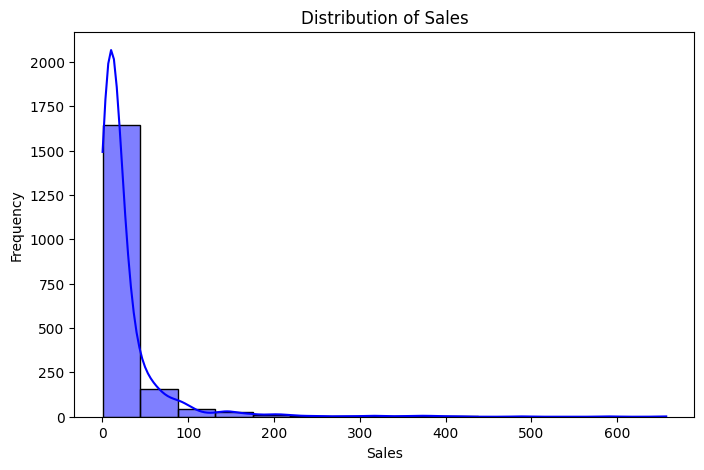

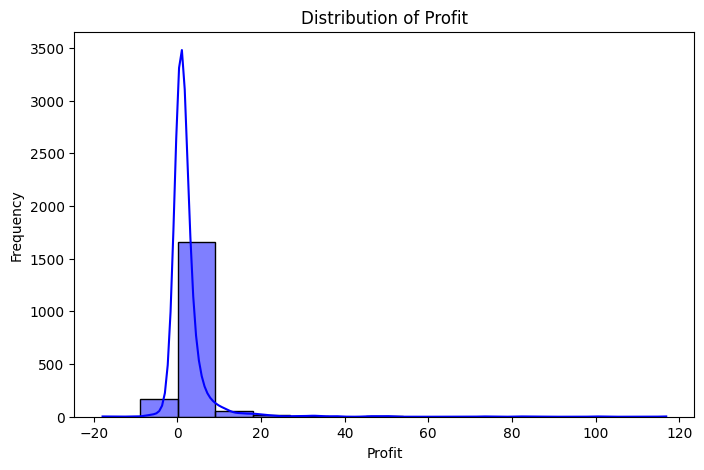

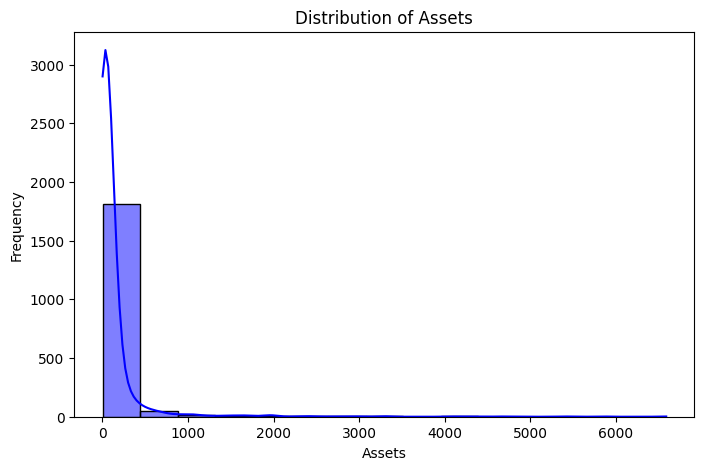

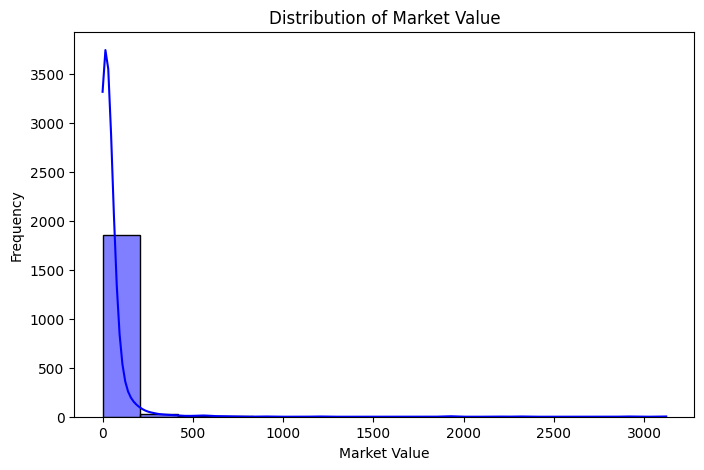

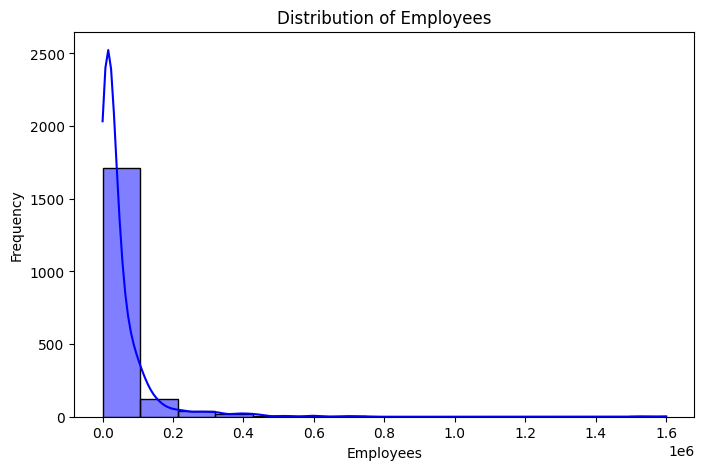

In [13]:
# Visualize the distribution of numerical variables
numerical_cols = ['Sales', 'Profit', 'Assets', 'Market Value', 'Employees']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_cleaned[col], kde=True, bins=15, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

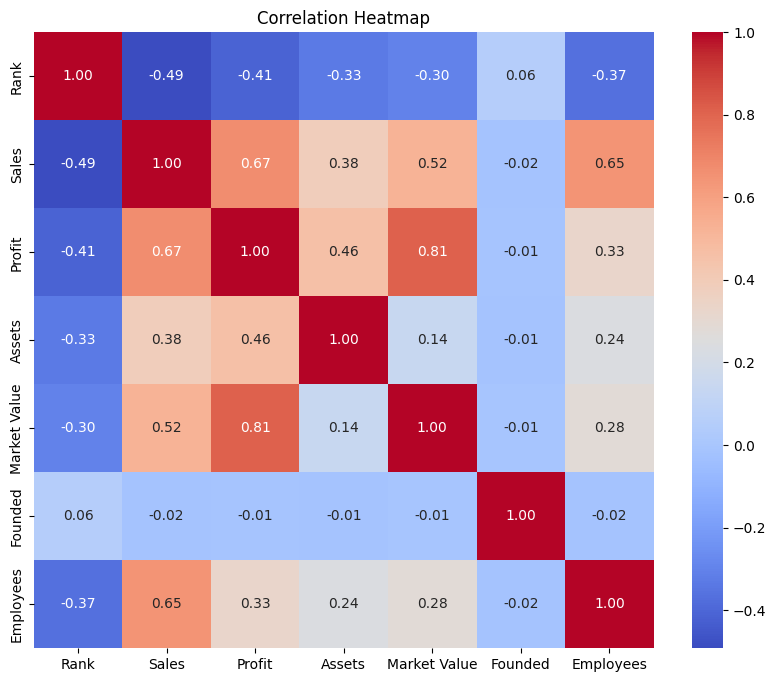

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_data = data_cleaned.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

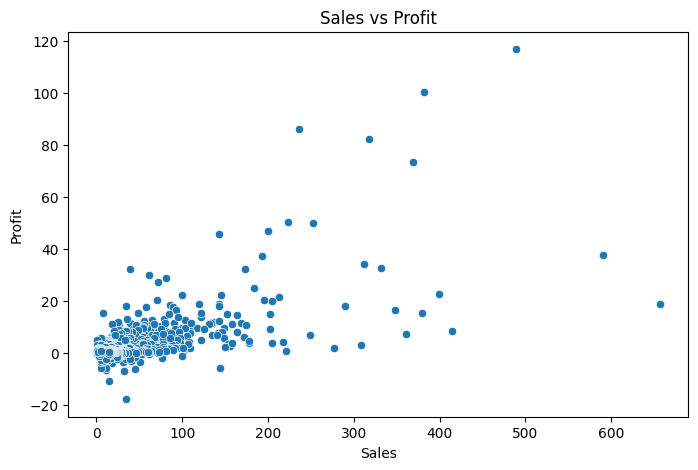

In [18]:
# Scatter plot for Sales vs Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Profit', data=data_cleaned)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

In [19]:

# Prepare data for machine learning
X = data_cleaned[['Sales', 'Assets', 'Market Value', 'Employees']]
y = data_cleaned['Profit']


In [20]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print("\nLinear Regression Performance:\n")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr)}")


Linear Regression Performance:

MSE: 4.457364043778337
R^2 Score: 0.63994681057825


In [22]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
print("\nDecision Tree Regressor Performance:\n")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_dt)}")


Decision Tree Regressor Performance:

MSE: 10.36564851825175
R^2 Score: 0.16269239560299642


In [23]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("\nRandom Forest Regressor Performance:\n")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Regressor Performance:

MSE: 2.688173772236325
R^2 Score: 0.782856968623737


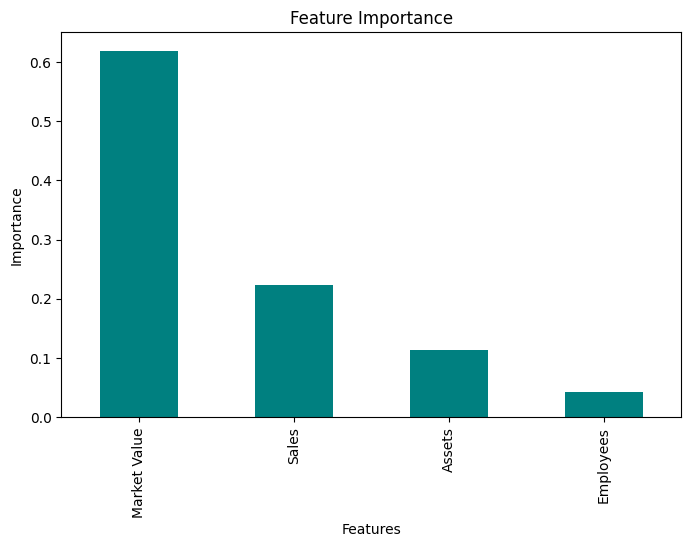

In [24]:
# Visualizing feature importance from Random Forest
feature_importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), color='teal')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
